In [ ]:
#Import The Solar Flare Data Set Files
#change it according to your files location
labelFile="Data\\labels_1540_4classes_icmla_21.pck"
inputsFile="Data\\mvts_1540_icmla_21.pck"

--2022-07-28 18:51:20--  https://www.dropbox.com/s/uy58al2rwf6yn9u/labels_1540_4classes_icmla_21.pck
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/uy58al2rwf6yn9u/labels_1540_4classes_icmla_21.pck [following]
--2022-07-28 18:51:21--  https://www.dropbox.com/s/raw/uy58al2rwf6yn9u/labels_1540_4classes_icmla_21.pck
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc10ab98f2d9f7c69457147d4f82.dl.dropboxusercontent.com/cd/0/inline/Bp-cVCq0-WOccwKz5_1GpuFDR1UKllxMq_gaJ1NdtPOFRYPygspsM6WgrYD7xS9zLYXqFNLz2Kdgf0RaLAB34D1sVy_4e9Czaq3fzb0C492tCWAdJg31G2GjYfQC9IbV1OF5_VqHYttLOWa7I_3sersu3GGautijt_uIObqt-4yMYw/file# [following]
--2022-07-28 18:51:21--  https://uc10ab98f2d9f7c69457147d4f82.dl.dropboxusercontent.com/cd/0/inline/Bp-cV

In [ ]:

import pandas as pd
import pickle

import numpy as np



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


import random
import matplotlib.pyplot as plt


In [ ]:
def loadInputs(file_name):
        with open(file_name, 'rb') as fp:
            obj = pickle.load(fp)
        return obj

In [ ]:
#device = torch.device('cpu')
#print("Processing in :",device)

Sampled_inputs=loadInputs("mvts_1540_icmla_21.pck")
Sampled_labels=loadInputs("labels_1540_4classes_icmla_21.pck") 
trainData = Sampled_inputs
trainLabel = Sampled_labels
print("trainData.shape: ", trainData.shape)
print("trainLebel.shape: ", trainLabel.shape)
print("Classes/labels : ",np.unique(trainLabel))

trainData.shape:  (1540, 33, 60)
trainLebel.shape:  (1540,)
Classes/labels :  [0 1 2 3]


In [ ]:
#standardization/z normalization of the univaraite time series
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
npArrays=[]
for l in range(0, len(trainData)):
  trainData_std = sc.fit_transform(trainData[l])
  #trainData_std = trainData_std.astype(np.float64)
  #print(type(trainData_std[0][0]))
  npArrays.append(trainData_std)

print(type(npArrays))
arr = np.asarray(npArrays)
print(type(arr))
trainData=arr
print("trainData.shape: ",trainData.shape)
print(type(trainData))
print("trainLebel.shape: ",trainLabel.shape)
print(type(trainLabel))

<class 'list'>
<class 'numpy.ndarray'>
trainData.shape:  (1540, 33, 60)
<class 'numpy.ndarray'>
trainLebel.shape:  (1540,)
<class 'numpy.ndarray'>


In [ ]:
#Transposing trainData to shape:(1540, 60, 33)
trainDatatemp=np.empty([1540,60, 33])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l]
  temp=temp.T
  trainDatatemp[l,:,:]=temp
  

trainData=trainDatatemp
print("Transposing trainData shape: ",trainData.shape)

Transposing trainData shape:  (1540, 60, 33)


In [ ]:
#Taking the first 25 parameters which are based parameters:(1540, 60, 25)
trainDatat1=np.empty([1540,60, 25])
n=len(trainData)
for l in range(0, n):
  temp=trainData[l,:,0:25]
  trainDatat1[l,:,:]=temp
  

trainData=trainDatat1
print("trainData shape: ",trainData.shape)

trainData shape:  (1540, 60, 25)


In [ ]:
# Stratify the data
r=0
validation_size=0.2
mvts_1540=trainData
labels_1540=trainLabel
X_train, X_test, y_train, y_test = train_test_split(mvts_1540, labels_1540, test_size=0.3, random_state=r, stratify=labels_1540)
print("\n\n\n *************** Validation Size is: ", validation_size,"of training size")
print("after train validation split:")
X_train, X_val,y_train, y_val= train_test_split(X_train,y_train, test_size=validation_size,random_state=r,stratify=y_train)
#check percentage of examples
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)
print("X_val shape: ",X_val.shape) 
print("y_val shape ",y_val.shape)
unique_y_train, counts_y_train = np.unique(y_train, return_counts=True)
y_train_stats = dict(zip(unique_y_train, counts_y_train))
print("y_train_counts")
print(y_train_stats)
#270/(269+269+270+270) = 0.25
unique_y_val, counts_y_val = np.unique(y_val, return_counts=True)
y_val_stats = dict(zip(unique_y_val, counts_y_val))
print("y_validation_counts")
print(y_val_stats)
unique_y_test, counts_y_test = np.unique(y_test, return_counts=True)
y_test_stats = dict(zip(unique_y_test, counts_y_test))
print("y_test_counts")
print(y_test_stats)#116/(116+116+115+115) = 0.25




 *************** Validation Size is:  0.2 of training size
after train validation split:
X_train shape:  (862, 60, 25)
y_train shape:  (862,)
X_test shape:  (462, 60, 25)
y_test shape:  (462,)
X_val shape:  (216, 60, 25)
y_val shape  (216,)
y_train_counts
{0: 215, 1: 215, 2: 216, 3: 216}
y_validation_counts
{0: 54, 1: 54, 2: 54, 3: 54}
y_test_counts
{0: 116, 1: 116, 2: 115, 3: 115}


In [ ]:
#Dimensionality Reduction Step
#Calculating the mean for each MVTS column (25 parameters which are based parameters)
trainDatatmean=np.empty([862,25])
n=len(X_train)
for l in range(0, n):
  temp=X_train[l,:,:]
  #print(temp.shape)
  #print(temp.shape[0])
  #print(temp.shape[1])
  x=temp.mean(axis=0)
  #print("mean for mvts:",l,"is=",x)
  trainDatatmean[l]=x

x_train=trainDatatmean
print("trainDatatmean shape: ",trainDatatmean.shape)
   


trainDatatmean shape:  (862, 25)


In [ ]:
print(trainDatatmean[0])

[ 0.10970546  0.10970546  0.25683395  0.10970546  0.10970546  0.10970546
  0.12323007 -5.1863761   0.10970546  0.10970546  0.10970546  0.10970546
  0.10970546  0.10970546  0.10970546  0.10970546  0.10970546 -0.57621396
  0.10970546  0.10970546  2.31077327  0.10970546  0.10970546  0.10970546
  0.10970546]


In [ ]:
c=np.mean(X_train[0,:,7])
print(c)

-5.186376103170483


In [ ]:
# Fisher Score: Univariate feature selection
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=25)
selector.fit(x_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]


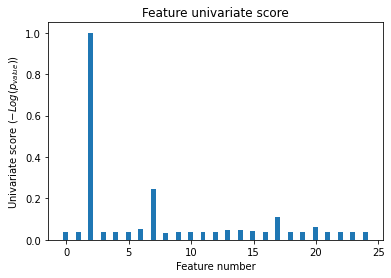

In [ ]:
import matplotlib.pyplot as plt

X_indices = np.arange(trainData.shape[-1])
print(X_indices)
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.4)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


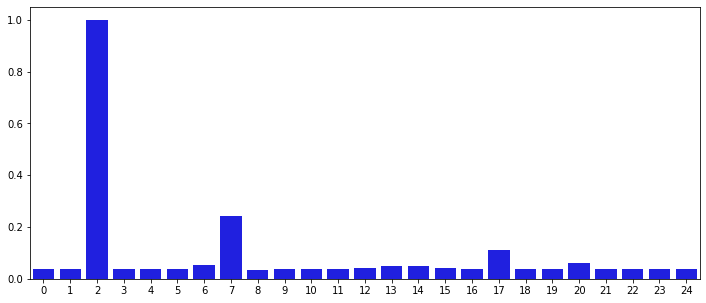

In [ ]:
import seaborn as sns
X= np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.subplots(figsize=(12,5)) # set the size that you'd like (width, height)
clrs = ['blue' ]
sns.barplot(X_indices, scores,label=X_indices,x="Feature number", y="Univariate score ($-Log(p_{value})$)",palette=clrs)

In [ ]:
for i in range(0,25):
 print(X_indices[i], scores[i])

0 0.0369394000277584
1 0.036939400027751174
2 1.0
3 0.0369394000341733
4 0.0369394000277584
5 0.03693940002617266
6 0.05426149795814052
7 0.2430020579467021
8 0.0345023715684881
9 0.03687493619882286
10 0.037309502584302615
11 0.038564764545792184
12 0.040012556922913965
13 0.047810198097100284
14 0.048339771144624726
15 0.042128327338143826
16 0.03694023187587944
17 0.11010435052767
18 0.03713320134448587
19 0.03694552144456659
20 0.05974805234686673
21 0.03694491001742527
22 0.03696475054897974
23 0.0369394000277584
24 0.0369394000277584


In [ ]:
from tabulate import tabulate
df=pd.DataFrame({'Feature Number': X+1, 'Fisher Score': scores})
print(tabulate(df,headers="keys", tablefmt='fancy_grid'))

╒════╤══════════════════╤════════════════╕
│    │   Feature Number │   Fisher Score │
╞════╪══════════════════╪════════════════╡
│  0 │                1 │      0.0369394 │
├────┼──────────────────┼────────────────┤
│  1 │                2 │      0.0369394 │
├────┼──────────────────┼────────────────┤
│  2 │                3 │      1         │
├────┼──────────────────┼────────────────┤
│  3 │                4 │      0.0369394 │
├────┼──────────────────┼────────────────┤
│  4 │                5 │      0.0369394 │
├────┼──────────────────┼────────────────┤
│  5 │                6 │      0.0369394 │
├────┼──────────────────┼────────────────┤
│  6 │                7 │      0.0542615 │
├────┼──────────────────┼────────────────┤
│  7 │                8 │      0.243002  │
├────┼──────────────────┼────────────────┤
│  8 │                9 │      0.0345024 │
├────┼──────────────────┼────────────────┤
│  9 │               10 │      0.0368749 │
├────┼──────────────────┼────────────────┤
│ 10 │     

In [ ]:
df.to_excel('Fisher_Scores.xlsx')